In [48]:
import matplotlib.pyplot as plt
import re
import math

In [49]:
with open("/home/ltetrel/Documents/work/DeepNeuroAN/notebooks/res", 'r') as f:
    X = f.readlines()

In [50]:
switch = False
values = {'x':[], 'y':[], 'z':[]}
match_float = "[+-]?[0-9]*[.]?[0-9]+"

for x in enumerate(X):
    if re.match(".*?_bs(" + match_float + ")_lr(" + match_float + ").*?", x[1]):
        switch = False
        match = re.match(".*?_bs(" + match_float + ")_lr(" + match_float + ").*?", x[1])
        values['x'] += [float(match.group(1))]
        values['y'] += [float(match.group(2))]
    if re.match(".*?val_mae: ("+ match_float + ").*?", x[1]):
        match = re.match(".*?val_mae: ("+ match_float + ").*?", x[1])
        values['z'] += [float(match.group(1))]

In [47]:
# using log to reduce high number impact
for i in range(len(values['z'])):
    if values['z'][i] is not None:
        values['z'][i] = math.log(values['z'][i])


In [31]:
# removing outliers
# for i in range(len(values['z'])):
#     if values['z'][i] > 10:
#         values['z'][i] = 10

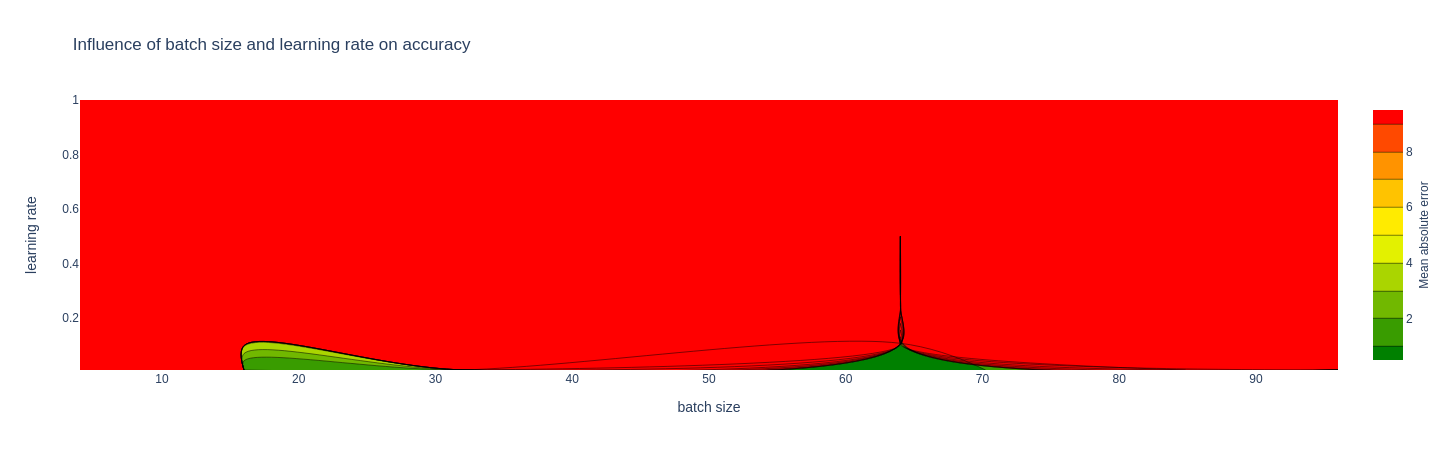

In [103]:
import plotly.graph_objects as go

#Heatmap
fig = go.Figure(data=go.Contour(x=values['x']
                                , y=values['y']
                                , z=values['z']
                                , zmin=0
                                , zmid=1
                                , zmax=10
                                , colorscale=[[0, "green"], [0.5, "yellow"], [0.75, "orange"], [1, "red"]]
                                , colorbar=dict(title="Mean absolute error", titleside="right")
                               ))
fig.update_layout(title="Influence of batch size and learning rate on accuracy",
                  xaxis_title="batch size",
                  yaxis_title="learning rate")

fig.show(renderer="jupyterlab")

#3d scatter
# fig = go.Figure(data=[go.Scatter3d(x=values['x'], y=values['y'], z=values['z'], mode='markers')])
# fig.update_layout(title="Influence of batch size and learning rate on accuracy",
#                   scene = dict(
#                     xaxis_title='batch size',
#                     yaxis_title='learning rate',
#                     zaxis_title='mae (log)'))

# fig.show(renderer="jupyterlab")